In [5]:
import pandas as pd
from multiprocessing import Pool
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pyalluvial.alluvial as alluvial
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scikit_posthocs as sp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
pathways = pd.read_csv('../../Data/DataBasePathway/hsa_p_value_matrices/KEGG_validated_miRTarBase_strong.csv')
pathways

,ABC transporters,Acute myeloid leukemia,Adherens junction,Adipocytokine signaling pathway,Adrenergic signaling in cardiomyocytes,African trypanosomiasis,"Alanine, aspartate and glutamate metabolism",Alcoholism,Aldosterone-regulated sodium reabsorption,Allograft rejection,...,Ubiquitin mediated proteolysis,VEGF signaling pathway,Vascular smooth muscle contraction,Vasopressin-regulated water reabsorption,Vibrio cholerae infection,Viral carcinogenesis,Viral myocarditis,Wnt signaling pathway,mTOR signaling pathway,p53 signaling pathway
hsa-let-7a-5p,1.0,0.003668,1.000000,1.000000,1.0,1.000000,1.0,0.072422,1.0,1.0,...,1.000000,0.043042,1.0,1.0,1.0,0.000247,1.0,0.190403,1.000000,0.000614
hsa-let-7b-5p,1.0,0.009473,0.152453,0.131086,1.0,1.000000,1.0,0.152453,1.0,1.0,...,0.151988,0.027993,1.0,1.0,1.0,0.005093,1.0,0.307708,1.000000,0.009473
hsa-let-7c-5p,1.0,0.007011,0.109576,0.087144,1.0,0.033478,1.0,1.000000,1.0,1.0,...,1.000000,1.000000,1.0,1.0,1.0,0.089406,1.0,1.000000,0.087144,0.098423
hsa-let-7d-5p,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.0,...,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.000000
hsa-let-7e-5p,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.0,...,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.0,0.112421,1.000000,0.010517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa-miR-153-5p,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.0,...,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,0.009710,1.000000
hsa-miR-433-5p,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.0,...,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.000000
hsa-miR-942-3p,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.0,...,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.000000
hsa-miR-203a-5p,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.0,...,1.000000,1.000000,1.0,1.0,1.0,0.004634,1.0,0.012842,1.000000,0.005138


In [4]:
dft = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_time_Filter.tsv', sep = '\t')
dfv = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_SinEstructuras_variant_Filter.tsv', sep = '\t')
dfs = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_spectral_Filter.tsv', sep = '\t')
dfsp = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_spectrum_Filter.tsv', sep = '\t')
dfgt = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_ConstantClusters_Filter.tsv', sep = '\t')
dft


KeyboardInterrupt



In [ ]:
dft.columns

In [ ]:
dft.drop(['function', 'p_value', '0'], axis = 1, inplace = True)
dfv.drop(['function', 'p_value', '0'], axis = 1, inplace = True)
dfs.drop(['function', 'p_value', '0'], axis = 1, inplace = True)
dfsp.drop(['function', 'p_value', '0'], axis = 1, inplace = True)
dfgt.drop(['function', 'p_value', '0'], axis = 1, inplace = True)

dft.drop_duplicates(keep='first', inplace = True)
dfv.drop_duplicates(keep='first', inplace = True)
dfs.drop_duplicates(keep='first', inplace = True)
dfsp.drop_duplicates(keep='first', inplace = True)
dfgt.drop_duplicates(keep='first', inplace = True)
dft

In [ ]:
n = 16
miRNA_validated = list(pathways.index)
def process(params):
    i, j, k, l, m, o, p = params
    if i in miRNA_validated:
        df_i = pd.DataFrame(pathways.loc[i].T).reset_index()
        df_i.columns = ['function', 'p_value']
        df_i = df_i[df_i['p_value']<=0.05]
        df_i['miRNA'] = i; df_i['Variant'] = j; df_i['DuplexEnergy'] = k; df_i['Jaccard']=l; df_i['Region'] = m
        df_i['UTR_region'] = o; df_i['InteractionRegionUTR'] = p
        return df_i
    else:
        return pd.DataFrame()

In [ ]:
with Pool(n) as p:
    resultst = p.map(process, zip(dft['miRNA'], dft['Variant'], dft['DuplexEnergy'], dft['Jaccard'], 
                                  dft['Region'], dft['UTR_region'], dft['InteractionRegionUTR']))

df_bdt = pd.concat(resultst)
df_bdt

In [48]:
with Pool(n) as p:
    resultsv = p.map(process, zip(dfv['miRNA'], dfv['Variant'], dfv['DuplexEnergy'], dfv['Jaccard'], 
                                  dfv['Region'], dfv['UTR_region'], dfv['InteractionRegionUTR']))

df_bdv = pd.concat(resultsv)
df_bdv

,function,p_value,miRNA,Variant,DuplexEnergy,Jaccard,Region,UTR_region,InteractionRegionUTR
60,Epstein-Barr virus infection,0.045499,hsa-miR-381-3p,22F,-20.5,0.812500,3'UTR,>22F:29760-29809,"16,31"
201,Viral carcinogenesis,0.045499,hsa-miR-381-3p,22F,-20.5,0.812500,3'UTR,>22F:29760-29809,"16,31"
60,Epstein-Barr virus infection,0.045499,hsa-miR-381-3p,22A,-20.5,0.812500,3'UTR,>22A:29775-29790,"1,16"
201,Viral carcinogenesis,0.045499,hsa-miR-381-3p,22A,-20.5,0.812500,3'UTR,>22A:29775-29790,"1,16"
60,Epstein-Barr virus infection,0.045499,hsa-miR-381-3p,23D,-20.5,0.812500,3'UTR,>23D:29763-29858,"13,28"
...,...,...,...,...,...,...,...,...,...
164,Renal cell carcinoma,0.000519,hsa-miR-199a-3p,21H,-10.0,0.916667,5'UTR,>21H:256-255,"1,12"
166,Retrograde endocannabinoid signaling,0.045843,hsa-miR-199a-3p,21H,-10.0,0.916667,5'UTR,>21H:256-255,"1,12"
194,Type II diabetes mellitus,0.048625,hsa-miR-199a-3p,21H,-10.0,0.916667,5'UTR,>21H:256-255,"1,12"
197,VEGF signaling pathway,0.001076,hsa-miR-199a-3p,21H,-10.0,0.916667,5'UTR,>21H:256-255,"1,12"


In [49]:
with Pool(n) as p:
    resultss = p.map(process, zip(dfs['miRNA'], dfs['Variant'], dfs['DuplexEnergy'], dfs['Jaccard'], 
                                  dfs['Region'], dfs['UTR_region'], dfs['InteractionRegionUTR']))

df_bds = pd.concat(resultss)
df_bds

,function,p_value,miRNA,Variant,DuplexEnergy,Jaccard,Region,UTR_region,InteractionRegionUTR
60,Epstein-Barr virus infection,0.045499,hsa-miR-381-3p,G1,-20.5,0.812500,3'UTR,>G1:29824-29823,"1,16"
201,Viral carcinogenesis,0.045499,hsa-miR-381-3p,G1,-20.5,0.812500,3'UTR,>G1:29824-29823,"1,16"
1,Acute myeloid leukemia,0.024545,hsa-miR-503-5p,G3,-20.4,0.823529,5'UTR,>G3:45-105,"7,23"
15,Apoptosis,0.028590,hsa-miR-503-5p,G3,-20.4,0.823529,5'UTR,>G3:45-105,"7,23"
29,Bladder cancer,0.001439,hsa-miR-503-5p,G3,-20.4,0.823529,5'UTR,>G3:45-105,"7,23"
...,...,...,...,...,...,...,...,...,...
190,Toxoplasmosis,0.000001,hsa-miR-29b-3p,G2,-10.0,0.800000,3'UTR,>G2:29824-29823,"23,42"
191,Transcriptional misregulation in cancer,0.021506,hsa-miR-29b-3p,G2,-10.0,0.800000,3'UTR,>G2:29824-29823,"23,42"
192,Tuberculosis,0.027298,hsa-miR-29b-3p,G2,-10.0,0.800000,3'UTR,>G2:29824-29823,"23,42"
197,VEGF signaling pathway,0.003531,hsa-miR-29b-3p,G2,-10.0,0.800000,3'UTR,>G2:29824-29823,"23,42"


In [51]:
with Pool(n) as p:
    resultsp = p.map(process, zip(dfsp['miRNA'], dfsp['Variant'], dfsp['DuplexEnergy'], dfsp['Jaccard'], 
                                  dfsp['Region'], dfsp['UTR_region'], dfsp['InteractionRegionUTR']))

df_bdsp = pd.concat(resultsp)
df_bdsp

,function,p_value,miRNA,Variant,DuplexEnergy,Jaccard,Region,UTR_region,InteractionRegionUTR
1,Acute myeloid leukemia,0.023961,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"50,70"
58,Endometrial cancer,0.023961,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"50,70"
61,ErbB signaling pathway,0.012417,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"50,70"
73,Glioma,0.023961,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"50,70"
80,HIF-1 signaling pathway,0.012417,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"50,70"
...,...,...,...,...,...,...,...,...,...
57,Endocytosis,0.042098,hsa-miR-140-5p,Gs1,-10.0,0.800000,3'UTR,>Gs1:29707-29733,"7,16"
133,Pancreatic cancer,0.040475,hsa-miR-140-5p,Gs1,-10.0,0.800000,3'UTR,>Gs1:29707-29733,"7,16"
137,Pathways in cancer,0.016392,hsa-miR-140-5p,Gs1,-10.0,0.800000,3'UTR,>Gs1:29707-29733,"7,16"
160,Rap1 signaling pathway,0.042098,hsa-miR-140-5p,Gs1,-10.0,0.800000,3'UTR,>Gs1:29707-29733,"7,16"


In [52]:
with Pool(n) as p:
    resultgt =  p.map(process, zip(dfgt['miRNA'], dfgt['Variant'], dfgt['DuplexEnergy'], dfgt['Jaccard'], 
                                  dfgt['Region'], dfgt['UTR_region'], dfgt['InteractionRegionUTR']))

df_bdgt = pd.concat(resultgt)
df_bdgt

,function,p_value,miRNA,Variant,DuplexEnergy,Jaccard,Region,UTR_region,InteractionRegionUTR
1,Acute myeloid leukemia,2.454530e-02,hsa-miR-503-5p,Gst2,-20.4,0.823529,5'UTR,>Gst2:45-77,"7,23"
15,Apoptosis,2.859020e-02,hsa-miR-503-5p,Gst2,-20.4,0.823529,5'UTR,>Gst2:45-77,"7,23"
29,Bladder cancer,1.439360e-03,hsa-miR-503-5p,Gst2,-20.4,0.823529,5'UTR,>Gst2:45-77,"7,23"
35,Cell cycle,2.328940e-08,hsa-miR-503-5p,Gst2,-20.4,0.823529,5'UTR,>Gst2:45-77,"7,23"
40,Chronic myeloid leukemia,1.439360e-03,hsa-miR-503-5p,Gst2,-20.4,0.823529,5'UTR,>Gst2:45-77,"7,23"
...,...,...,...,...,...,...,...,...,...
183,TGF-beta signaling pathway,4.292730e-02,hsa-miR-497-5p,Gst1,-10.0,0.818182,5'UTR,>Gst1:256-255,"2,12"
201,Viral carcinogenesis,4.292730e-02,hsa-miR-497-5p,Gst1,-10.0,0.818182,5'UTR,>Gst1:256-255,"2,12"
204,mTOR signaling pathway,3.673040e-03,hsa-miR-497-5p,Gst1,-10.0,0.818182,5'UTR,>Gst1:256-255,"2,12"
205,p53 signaling pathway,4.664510e-03,hsa-miR-497-5p,Gst1,-10.0,0.818182,5'UTR,>Gst1:256-255,"2,12"


In [53]:
df_bdt.to_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_time_Filter_KEGG.tsv', sep = '\t', index = False)
df_bdv.to_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_SinEstructuras_variant_Filter_KEGG.tsv', sep = '\t', index = False)
df_bds.to_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_spectral_Filter_KEGG.tsv', sep = '\t', index = False)
df_bdsp.to_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_spectrum_Filter_KEGG.tsv', sep = '\t', index = False)
df_bdgt.to_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_ConstantClusters_Filter_KEGG.tsv', sep = '\t', index = False)

In [55]:
dft_pathways_count = pd.DataFrame(df_bdgt[['function', 'Variant']].value_counts()).reset_index()
df_top10t = dft_pathways_count.groupby(['Variant']).head(15)
df_top10t

,function,Variant,count
0,MicroRNAs in cancer,Gst2,67
1,Pathways in cancer,Gst2,58
2,Prostate cancer,Gst2,47
3,MicroRNAs in cancer,Gst1,46
4,PI3K-Akt signaling pathway,Gst2,42
5,Proteoglycans in cancer,Gst2,42
6,FoxO signaling pathway,Gst2,38
7,Hepatitis B,Gst2,38
8,Pancreatic cancer,Gst2,38
9,Pathways in cancer,Gst1,38


# Filter astringent

In [6]:
dft = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_time_Filter_KEGG.tsv', sep = '\t')
dfv = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_SinEstructuras_variant_Filter_KEGG.tsv', sep = '\t')
dfs = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_spectral_Filter_KEGG.tsv', sep = '\t')
dfsp = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_spectrum_Filter_KEGG.tsv', sep = '\t')
dfgt = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_ConstantClusters_Filter_KEGG.tsv', sep = '\t')
dft

,function,p_value,miRNA,Variant,DuplexEnergy,Jaccard,Region,UTR_region,InteractionRegionUTR
0,Epstein-Barr virus infection,0.045499,hsa-miR-381-3p,"(2010-12-05,2020-03-01]",-20.5,0.812500,3'UTR,">(2010-12-05,2020-03-01]:29763-29844","13,28"
1,Viral carcinogenesis,0.045499,hsa-miR-381-3p,"(2010-12-05,2020-03-01]",-20.5,0.812500,3'UTR,">(2010-12-05,2020-03-01]:29763-29844","13,28"
2,Cell cycle,0.023114,hsa-miR-18b-5p,"(2021-01-01,2021-05-01]",-19.9,0.809524,5'UTR,">(2021-01-01,2021-05-01]:128-127","1,21"
3,Endocytosis,0.023114,hsa-miR-18b-5p,"(2021-01-01,2021-05-01]",-19.9,0.809524,5'UTR,">(2021-01-01,2021-05-01]:128-127","1,21"
4,FoxO signaling pathway,0.009952,hsa-miR-18b-5p,"(2021-01-01,2021-05-01]",-19.9,0.809524,5'UTR,">(2021-01-01,2021-05-01]:128-127","1,21"
...,...,...,...,...,...,...,...,...,...
10295,Viral carcinogenesis,0.042927,hsa-miR-497-5p,"(2022-01-01,2022-06-01]",-10.0,0.818182,5'UTR,">(2022-01-01,2022-06-01]:256-255","2,12"
10296,mTOR signaling pathway,0.003673,hsa-miR-497-5p,"(2022-01-01,2022-06-01]",-10.0,0.818182,5'UTR,">(2022-01-01,2022-06-01]:256-255","2,12"
10297,p53 signaling pathway,0.004665,hsa-miR-497-5p,"(2022-01-01,2022-06-01]",-10.0,0.818182,5'UTR,">(2022-01-01,2022-06-01]:256-255","2,12"
10298,Huntington's disease,0.000202,hsa-miR-1285-3p,"(2022-11-01,2023-01-01]",-10.0,0.875000,5'UTR,">(2022-11-01,2023-01-01]:256-255","1,8"


In [7]:
dft = dft[dft['p_value'] <= 0.001]
dft = dft[~dft['function'].str.contains('cancer', case=False, na=False)]
dft = dft[dft['function'].str.contains('pathway', case=False, na=False)]

dfv = dfv[dfv['p_value'] <= 0.001]
dfv = dfv[~dfv['function'].str.contains('cancer', case=False, na=False)]
dfv = dfv[dfv['function'].str.contains('pathway', case=False, na=False)]

dfs = dfs[dfs['p_value'] <= 0.001]
dfs = dfs[~dfs['function'].str.contains('cancer', case=False, na=False)]
dfs = dfs[dfs['function'].str.contains('pathway', case=False, na=False)]

dfsp = dfsp[dfsp['p_value'] <= 0.001]
dfsp = dfsp[~dfsp['function'].str.contains('cancer', case=False, na=False)]
dfsp = dfsp[dfsp['function'].str.contains('pathway', case=False, na=False)]

dfgt = dfgt[dfgt['p_value'] <= 0.001]
dfgt = dfgt[~dfgt['function'].str.contains('cancer', case=False, na=False)]
dfgt = dfgt[dfgt['function'].str.contains('pathway', case=False, na=False)]

dfsp

,function,p_value,miRNA,Variant,DuplexEnergy,Jaccard,Region,UTR_region,InteractionRegionUTR
75,FoxO signaling pathway,1.850600e-04,hsa-let-7b-5p,Gs2,-19.2,0.833333,5'UTR,>Gs2:45-173,"56,79"
91,PI3K-Akt signaling pathway,3.869080e-04,hsa-let-7b-5p,Gs2,-19.2,0.833333,5'UTR,>Gs2:45-173,"56,79"
116,FoxO signaling pathway,1.850600e-04,hsa-let-7b-5p,Gs4,-19.2,0.833333,5'UTR,>Gs4:45-209,"56,79"
132,PI3K-Akt signaling pathway,3.869080e-04,hsa-let-7b-5p,Gs4,-19.2,0.833333,5'UTR,>Gs4:45-209,"56,79"
157,FoxO signaling pathway,1.850600e-04,hsa-let-7b-5p,Gs3,-19.2,0.833333,5'UTR,>Gs3:45-173,"56,79"
...,...,...,...,...,...,...,...,...,...
4699,PI3K-Akt signaling pathway,5.638910e-11,hsa-miR-29b-3p,Gs3,-10.0,0.800000,3'UTR,>Gs3:29824-29823,"23,42"
4702,Prolactin signaling pathway,3.415570e-04,hsa-miR-29b-3p,Gs3,-10.0,0.800000,3'UTR,>Gs3:29824-29823,"23,42"
4741,Estrogen signaling pathway,3.116820e-04,hsa-miR-29b-3p,Gs4,-10.0,0.800000,3'UTR,>Gs4:29824-29823,"33,52"
4764,PI3K-Akt signaling pathway,5.638910e-11,hsa-miR-29b-3p,Gs4,-10.0,0.800000,3'UTR,>Gs4:29824-29823,"33,52"


In [8]:
dft_pathways_count = pd.DataFrame(dft[['function', 'Variant']].value_counts()).reset_index()
df_top10t = dft_pathways_count.groupby(['Variant']).head(10)

df_top10t['RF'] = df_top10t['count'] / df_top10t.groupby('Variant')['count'].transform('sum')
df_top10t.columns = ['pathway', 'time', 'count', 'RF']
print(df_top10t.head())
df_top10t.to_csv('../../Data/Alluvial_kegg.tsv', sep = '\t', index = False)

                      pathway                     time  count        RF
0  PI3K-Akt signaling pathway  (2022-06-01,2022-11-01]     14  0.325581
1  PI3K-Akt signaling pathway  (2021-01-01,2021-05-01]     13  0.325000
2  PI3K-Akt signaling pathway  (2022-01-01,2022-06-01]     13  0.317073
3  PI3K-Akt signaling pathway  (2021-05-01,2022-01-01]     12  0.333333
4  PI3K-Akt signaling pathway  (2022-11-01,2023-01-01]     12  0.324324


/tmp/ipykernel_8737/3452552900.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10t['RF'] = df_top10t['count'] / df_top10t.groupby('Variant')['count'].transform('sum')


# PCA

In [9]:
dfvm = pd.DataFrame(dfv[['function', 'Variant', 'Region']].value_counts()).reset_index()
dfvm

,function,Variant,Region,count
0,PI3K-Akt signaling pathway,23F,5'UTR,12
1,PI3K-Akt signaling pathway,23A,5'UTR,11
2,PI3K-Akt signaling pathway,22D,5'UTR,11
3,PI3K-Akt signaling pathway,20D,5'UTR,11
4,PI3K-Akt signaling pathway,23C,5'UTR,11
...,...,...,...,...
806,Insulin signaling pathway,21F,3'UTR,1
807,Insulin signaling pathway,21F,5'UTR,1
808,Insulin signaling pathway,21G,5'UTR,1
809,Insulin signaling pathway,21H,3'UTR,1


In [10]:
dfvm['function'].unique()

array(['PI3K-Akt signaling pathway', 'p53 signaling pathway',
       'Ras signaling pathway', 'FoxO signaling pathway',
       'Rap1 signaling pathway', 'Prolactin signaling pathway',
       'mTOR signaling pathway', 'Jak-STAT signaling pathway',
       'Neurotrophin signaling pathway', 'Wnt signaling pathway',
       'HIF-1 signaling pathway', 'TGF-beta signaling pathway',
       'T cell receptor signaling pathway',
       'Thyroid hormone signaling pathway',
       'B cell receptor signaling pathway', 'Estrogen signaling pathway',
       'Chemokine signaling pathway', 'ErbB signaling pathway',
       'Insulin signaling pathway', 'Hippo signaling pathway'],
      dtype=object)

In [11]:
dfvm = dfvm.pivot(index= ['Variant', 'Region'], columns=['function'], values=['count'])
dfvm

count  \
function           B cell receptor signaling pathway   
Variant     Region                                     
19A         3'UTR                                NaN   
            5'UTR                                1.0   
19B         3'UTR                                NaN   
            5'UTR                                1.0   
20A         3'UTR                                NaN   
...                                              ...   
23E         5'UTR                                1.0   
23F         3'UTR                                NaN   
            5'UTR                                1.0   
recombinant 3'UTR                                NaN   
            5'UTR                                1.0   

                                                                       \
function           Chemokine signaling pathway ErbB signaling pathway   
Variant     Region                                                      
19A         3'UTR                          NaN                    NaN   
            5'UTR                          NaN                    1.0   
19B         3'UTR                          NaN                    NaN   
            5'UTR                          NaN                    1.0   
20A         3'UTR                          NaN                    NaN   
...                                        ...                    ...   
23E         5'UTR                          NaN                    1.0   
23F         3'UTR                          NaN                    NaN   
            5'UTR                          NaN                    1.0   
recombinant 3'UTR                          NaN                    NaN   
            5'UTR                          NaN                    1.0   

                                                                      \
function           Estrogen signaling pathway FoxO signaling pathway   
Variant     Region                                                     
19A         3'UTR                         NaN                    1.0   
            5'UTR                         1.0                    2.0   
19B         3'UTR                         NaN                    1.0   
            5'UTR                         1.0                    2.0   
20A         3'UTR                         NaN                    NaN   
...                                       ...                    ...   
23E         5'UTR                         1.0                    3.0   
23F         3'UTR                         NaN                    1.0   
            5'UTR                         1.0                    3.0   
recombinant 3'UTR                         NaN                    NaN   
            5'UTR                         1.0                    3.0   

                                                                    \
function           HIF-1 signaling pathway Hippo signaling pathway   
Variant     Region                                                   
19A         3'UTR                      1.0                     NaN   
            5'UTR                      1.0                     NaN   
19B         3'UTR                      NaN                     NaN   
            5'UTR                      1.0                     NaN   
20A         3'UTR                      1.0                     NaN   
...                                    ...                     ...   
23E         5'UTR                      1.0                     NaN   
23F         3'UTR                      1.0                     NaN   
            5'UTR                      1.0                     1.0   
recombinant 3'UTR                      1.0                     NaN   
            5'UTR                      2.0                     NaN   

                                                                         \
function           Insulin signaling pathway Jak-STAT signaling pathway   
Variant     Region                                                        
19A         3'UTR       

In [12]:
df_standardized = (dfvm - dfvm.mean()) / dfvm.std()
df_standardized = df_standardized.reset_index()
df_standardized.columns = df_standardized.columns.droplevel()
df_standardized.columns = ['Variant', 'Region'] + list(df_standardized.columns[2:len(df_standardized.columns)])
df_standardized.fillna(0, inplace=True)

# Separar las características y la etiqueta
df = df_standardized
X = df.drop(['Variant', 'Region'], axis=1)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Añadir las etiquetas de variante y región
pca_df['Variant'] = df['Variant']
pca_df['Region'] = df['Region']
pca_df

,PC1,PC2,Variant,Region
0,-3.105321,0.402801,19A,3'UTR
1,-0.141715,-1.364289,19A,5'UTR
2,-0.384944,-0.421844,19B,3'UTR
3,-0.141715,-1.364289,19B,5'UTR
4,-0.355018,-0.652392,20A,3'UTR
...,...,...,...,...
71,0.654726,0.034443,23E,5'UTR
72,1.560647,-2.642926,23F,3'UTR
73,2.045863,0.869249,23F,5'UTR
74,-2.553684,0.897719,recombinant,3'UTR


In [13]:
pca.explained_variance_ratio_

array([0.47606167, 0.16512825])

In [14]:
kmeans = KMeans(n_clusters=3) 

# Ajustar el modelo a los datos
kmeans.fit(pca_df[['PC1', 'PC2']])

# Obtener las etiquetas de los clusters
pca_df['cluster'] = kmeans.labels_
pca_df

,PC1,PC2,Variant,Region,cluster
0,-3.105321,0.402801,19A,3'UTR,1
1,-0.141715,-1.364289,19A,5'UTR,0
2,-0.384944,-0.421844,19B,3'UTR,0
3,-0.141715,-1.364289,19B,5'UTR,0
4,-0.355018,-0.652392,20A,3'UTR,0
...,...,...,...,...,...
71,0.654726,0.034443,23E,5'UTR,0
72,1.560647,-2.642926,23F,3'UTR,0
73,2.045863,0.869249,23F,5'UTR,2
74,-2.553684,0.897719,recombinant,3'UTR,1


In [15]:
dfsp = pd.DataFrame(dfsp[['function', 'Variant', 'Region']].value_counts()).reset_index()
dfsp

,function,Variant,Region,count
0,PI3K-Akt signaling pathway,Gs3,5'UTR,10
1,PI3K-Akt signaling pathway,Gs1,5'UTR,9
2,PI3K-Akt signaling pathway,Gs2,5'UTR,9
3,PI3K-Akt signaling pathway,Gs3,3'UTR,8
4,PI3K-Akt signaling pathway,Gs4,3'UTR,8
...,...,...,...,...
101,Ras signaling pathway,Gs1,3'UTR,1
102,Hippo signaling pathway,Gs1,5'UTR,1
103,Hippo signaling pathway,Gs1,3'UTR,1
104,Neurotrophin signaling pathway,Gs4,5'UTR,1


In [16]:
dfsp = dfsp.pivot(index= ['Variant', 'Region'], columns=['function'], values=['count'])
dfsp

count                         \
function       B cell receptor signaling pathway ErbB signaling pathway   
Variant Region                                                            
Gs1     3'UTR                                NaN                    NaN   
        5'UTR                                1.0                    1.0   
Gs2     3'UTR                                NaN                    NaN   
        5'UTR                                1.0                    1.0   
Gs3     3'UTR                                NaN                    NaN   
        5'UTR                                1.0                    1.0   
Gs4     3'UTR                                NaN                    NaN   
        5'UTR                                1.0                    1.0   

                                                                  \
function       Estrogen signaling pathway FoxO signaling pathway   
Variant Region                                                     
Gs1     3'UTR                         1.0                    3.0   
        5'UTR                         1.0                    3.0   
Gs2     3'UTR                         NaN                    NaN   
        5'UTR                         1.0                    3.0   
Gs3     3'UTR                         1.0                    1.0   
        5'UTR                         1.0                    4.0   
Gs4     3'UTR                         1.0                    2.0   
        5'UTR                         1.0                    3.0   

                                                                \
function       HIF-1 signaling pathway Hippo signaling pathway   
Variant Region                                                   
Gs1     3'UTR                      NaN                     1.0   
        5'UTR                      3.0                     1.0   
Gs2     3'UTR                      1.0                     NaN   
        5'UTR                      3.0                     1.0   
Gs3     3'UTR                      1.0                     1.0   
        5'UTR                      3.0                     1.0   
Gs4     3'UTR                      1.0                     1.0   
        5'UTR                      2.0                     1.0   

                                                                     \
function       Insulin signaling pathway Jak-STAT signaling pathway   
Variant Region                                                        
Gs1     3'UTR                        NaN                        NaN   
        5'UTR                        2.0                        1.0   
Gs2     3'UTR                        1.0                        NaN   
        5'UTR                        2.0                        1.0   
Gs3     3'UTR                        1.0                        NaN   
        5'UTR                        2.0                        2.0   
Gs4     3'UTR                        1.0                        NaN   
        5'UTR                        1.0                        1.0   

                                                                          \
function       Neurotrophin signaling pathway PI3K-Akt signaling pathway   
Variant Region                                                             
Gs1     3'UTR                             NaN                        7.0   
        5'UTR                             1.0                        9.0   
Gs2     3'UTR                             NaN                        3.0   
        5'UTR                             1.0                        9.0   
Gs3     3'UTR                             NaN                        8.0   
        5'UTR                             1.0                       10.0   
Gs4     3'UTR                             NaN                        8.0   
        5'UTR                             1.0                        8.0   

                                                                   \
function       Prolactin signaling pathway Rap1 signa

In [17]:
df_standardized = (dfsp - dfsp.mean()) / dfsp.std()
df_standardized = df_standardized.reset_index()
df_standardized.columns = df_standardized.columns.droplevel()
df_standardized.columns = ['Variant', 'Region'] + list(df_standardized.columns[2:len(df_standardized.columns)])
df_standardized.fillna(0, inplace=True)

# Separar las características y la etiqueta
df = df_standardized
X = df.drop(['Variant', 'Region'], axis=1)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Crear un DataFrame con los componentes principales
pca_df2 = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Añadir las etiquetas de variante y región
pca_df2['Variant'] = df['Variant']
pca_df2['Region'] = df['Region']
pca_df2

,PC1,PC2,Variant,Region
0,-2.545375,3.333965,Gs1,3'UTR
1,1.624850,0.085980,Gs1,5'UTR
2,-1.354649,-0.834711,Gs2,3'UTR
3,1.624850,0.085980,Gs2,5'UTR
4,-1.820888,-1.784112,Gs3,3'UTR
5,3.633904,0.725606,Gs3,5'UTR
6,-1.692069,-0.920266,Gs4,3'UTR
7,0.529377,-0.692442,Gs4,5'UTR


In [18]:
pca.explained_variance_ratio_

array([0.51166948, 0.25942733])

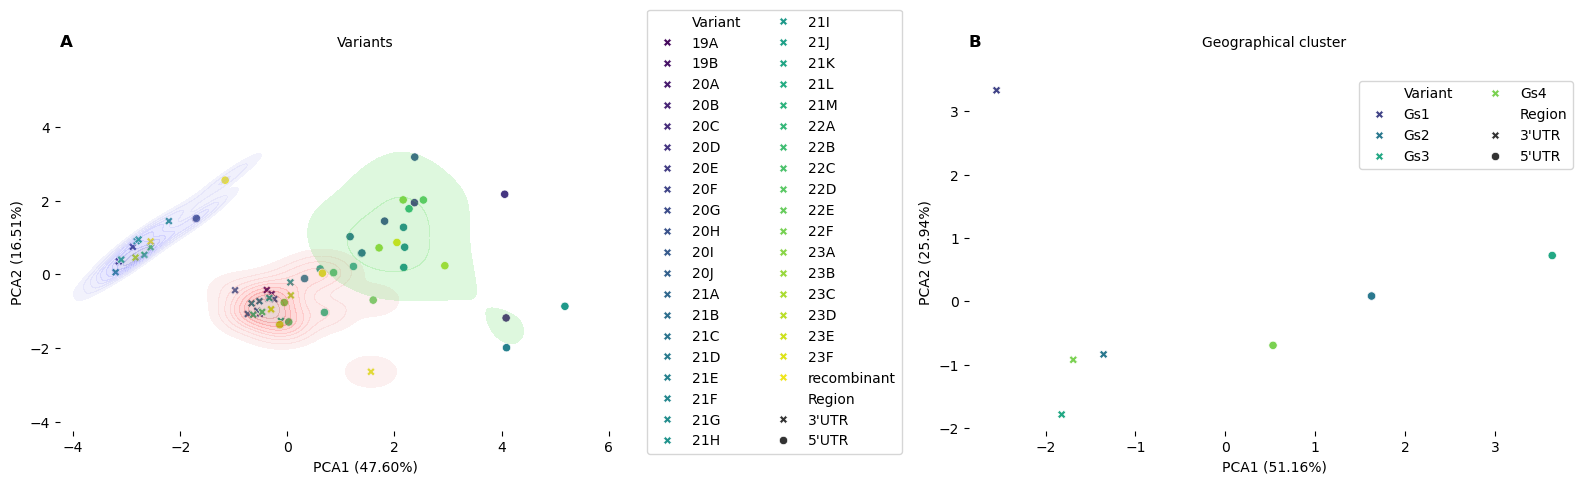

In [19]:
# Define markers
markers = {"5'UTR": 'o', "3'UTR": 'X'}

# Create a figure with two subplots in two columns
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# First plot
sns.scatterplot(data=pca_df2, x='PC1', y='PC2', hue='Variant', 
                markers=markers, style='Region', palette='viridis', ax=axes[1])
axes[1].set_xlabel('PCA1 (51.16%)')
axes[1].set_ylabel('PCA2 (25.94%)')
axes[1].legend(ncol=2)
sns.despine(left=True, bottom=True, ax=axes[1])


# Second plot
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Variant', 
                markers=markers, style='Region', palette='viridis', ax=axes[0])
sns.kdeplot(data=pca_df, x='PC1', y='PC2', fill=True, alpha=0.2, hue='cluster', 
            palette={0: 'red', 1: 'blue', 2: 'green', 3: 'purple'}, ax=axes[0])
axes[0].set_xlabel('PCA1 (47.60%)')
axes[0].set_ylabel('PCA2 (16.51%)')
axes[0].legend(ncol=2, bbox_to_anchor=(0.95, 1.2), loc='upper left')
sns.despine(left=True, bottom=True, ax=axes[0])


# Set titles for the subplots
axes[0].set_title("A", fontweight="bold", loc='left')
axes[1].set_title("B", fontweight="bold", loc='left')

axes[0].set_title('Variants', fontsize=10, pad=20)
axes[1].set_title('Geographical cluster', fontsize=10, pad=20)


plt.tight_layout()
plt.savefig('../../Plots/PCA_Variants_kegg.pdf', bbox_inches='tight')
plt.show()

# Outliers

In [20]:
dfv = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_SinEstructuras_variant_Filter_KEGG.tsv', sep = '\t')

dfv = dfv[dfv['p_value'] <= 0.001]
dfv = dfv[~dfv['function'].str.contains('cancer', case=False, na=False)]
dfv = dfv[dfv['function'].str.contains('pathway', case=False, na=False)]

dfvm = pd.DataFrame(dfv[['function', 'Variant', 'Region']].value_counts()).reset_index()
dfvm = dfvm.pivot(index= ['Variant', 'Region'], columns=['function'], values=['count'])
dfvm

count  \
function           B cell receptor signaling pathway   
Variant     Region                                     
19A         3'UTR                                NaN   
            5'UTR                                1.0   
19B         3'UTR                                NaN   
            5'UTR                                1.0   
20A         3'UTR                                NaN   
...                                              ...   
23E         5'UTR                                1.0   
23F         3'UTR                                NaN   
            5'UTR                                1.0   
recombinant 3'UTR                                NaN   
            5'UTR                                1.0   

                                                                       \
function           Chemokine signaling pathway ErbB signaling pathway   
Variant     Region                                                      
19A         3'UTR                          NaN                    NaN   
            5'UTR                          NaN                    1.0   
19B         3'UTR                          NaN                    NaN   
            5'UTR                          NaN                    1.0   
20A         3'UTR                          NaN                    NaN   
...                                        ...                    ...   
23E         5'UTR                          NaN                    1.0   
23F         3'UTR                          NaN                    NaN   
            5'UTR                          NaN                    1.0   
recombinant 3'UTR                          NaN                    NaN   
            5'UTR                          NaN                    1.0   

                                                                      \
function           Estrogen signaling pathway FoxO signaling pathway   
Variant     Region                                                     
19A         3'UTR                         NaN                    1.0   
            5'UTR                         1.0                    2.0   
19B         3'UTR                         NaN                    1.0   
            5'UTR                         1.0                    2.0   
20A         3'UTR                         NaN                    NaN   
...                                       ...                    ...   
23E         5'UTR                         1.0                    3.0   
23F         3'UTR                         NaN                    1.0   
            5'UTR                         1.0                    3.0   
recombinant 3'UTR                         NaN                    NaN   
            5'UTR                         1.0                    3.0   

                                                                    \
function           HIF-1 signaling pathway Hippo signaling pathway   
Variant     Region                                                   
19A         3'UTR                      1.0                     NaN   
            5'UTR                      1.0                     NaN   
19B         3'UTR                      NaN                     NaN   
            5'UTR                      1.0                     NaN   
20A         3'UTR                      1.0                     NaN   
...                                    ...                     ...   
23E         5'UTR                      1.0                     NaN   
23F         3'UTR                      1.0                     NaN   
            5'UTR                      1.0                     1.0   
recombinant 3'UTR                      1.0                     NaN   
            5'UTR                      2.0                     NaN   

                                                                         \
function           Insulin signaling pathway Jak-STAT signaling pathway   
Variant     Region                                                        
19A         3'UTR       

In [21]:
# Cálculo de cuartiles y IQR
Q1 = dfvm.quantile(0.25)
Q3 = dfvm.quantile(0.75)
IQR = Q3 - Q1

# Límites inferior y superior
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

# Identificación de outliers
outliers = dfvm[(dfvm < BI) | (dfvm > BS)]
outliers.reset_index(inplace=True)
outliers

Variant Region                             count  \
function                     B cell receptor signaling pathway   
0                 19A  3'UTR                               NaN   
1                 19A  5'UTR                               NaN   
2                 19B  3'UTR                               NaN   
3                 19B  5'UTR                               NaN   
4                 20A  3'UTR                               NaN   
..                ...    ...                               ...   
71                23E  5'UTR                               NaN   
72                23F  3'UTR                               NaN   
73                23F  5'UTR                               NaN   
74        recombinant  3'UTR                               NaN   
75        recombinant  5'UTR                               NaN   

                                                             \
function Chemokine signaling pathway ErbB signaling pathway   
0                                NaN                    NaN   
1                                NaN                    NaN   
2                                NaN                    NaN   
3                                NaN                    NaN   
4                                NaN                    NaN   
..                               ...                    ...   
71                               NaN                    NaN   
72                               NaN                    NaN   
73                               NaN                    NaN   
74                               NaN                    NaN   
75                               NaN                    NaN   

                                                            \
function Estrogen signaling pathway FoxO signaling pathway   
0                               NaN                    NaN   
1                               NaN                    NaN   
2                               NaN                    NaN   
3                               NaN                    NaN   
4                               NaN                    NaN   
..                              ...                    ...   
71                              NaN                    NaN   
72                              NaN                    NaN   
73                              NaN                    NaN   
74                              NaN                    NaN   
75                              NaN                    NaN   

                                                          \
function HIF-1 signaling pathway Hippo signaling pathway   
0                            NaN                     NaN   
1                            NaN                     NaN   
2                            NaN                     NaN   
3                            NaN                     NaN   
4                            NaN                     NaN   
..                           ...                     ...   
71                           NaN                     NaN   
72                           NaN                     NaN   
73                           NaN                     NaN   
74                           NaN                     NaN   
75                           2.0                     NaN   

                                    ...                             \
function Insulin signaling pathway  ... PI3K-Akt signaling pathway   
0                              NaN  ...                        NaN   
1                              NaN  ...                        NaN   
2                              NaN  ...                        NaN   
3                              NaN  ...                        NaN   
4                              NaN  ...                        NaN   
..                             ...  ...                        ...   
71                             NaN  ...                        NaN   
72                             NaN  ...                        NaN   
73                             NaN  ...        

In [22]:
outliers.columns = outliers.columns.droplevel()
outliers.columns = ['variant', 'region'] + list(outliers.columns[2:len(outliers.columns)])

df_melt = pd.melt(outliers, id_vars=['variant', 'region'], value_vars=outliers.columns[2:len(outliers.columns)])
print(df_melt.dropna())


dff5 = df_melt[df_melt['value']>1].pivot(index = ['variant', 'region'], columns=['variable'], values=['value']).reset_index()
dff5.columns = dff5.columns.droplevel()
dff5.columns = ['variant', 'region'] + list(dff5.columns[2:len(dff5.columns)])


dff3 = df_melt[(df_melt['value']>= 1)&(df_melt['region']=="3'UTR")].pivot(index = ['variant', 'region'], columns=['variable'], values=['value']).reset_index()
dff3.columns = dff3.columns.droplevel()
dff3.columns = ['variant', 'region'] + list(dff3.columns[2:len(dff3.columns)])


dff3.drop(['region'], axis=1, inplace=True); dff5.drop(['region'], axis=1, inplace=True)

print(dff5, dff3)
dff5.set_index('variant').T.to_csv('../../Data/MatrixOutliersVariants_5_kegg.tsv', sep='\t')
dff3.set_index('variant').T.to_csv('../../Data/MatrixOutliersVariants_3_kegg.tsv', sep='\t')

          variant region                 variable  value
387           20B  5'UTR  HIF-1 signaling pathway    2.0
391           20D  5'UTR  HIF-1 signaling pathway    2.0
393           20E  5'UTR  HIF-1 signaling pathway    2.0
399           20H  5'UTR  HIF-1 signaling pathway    2.0
401           20I  5'UTR  HIF-1 signaling pathway    2.0
...           ...    ...                      ...    ...
1430          23A  3'UTR   mTOR signaling pathway    1.0
1436          23D  3'UTR   mTOR signaling pathway    1.0
1440          23F  3'UTR   mTOR signaling pathway    3.0
1442  recombinant  3'UTR   mTOR signaling pathway    1.0
1443  recombinant  5'UTR   mTOR signaling pathway    1.0

[71 rows x 4 columns]
        variant  HIF-1 signaling pathway  Jak-STAT signaling pathway  \
0           20B                      2.0                         NaN   
1           20D                      2.0                         NaN   
2           20E                      NaN                         NaN   
3    

# Grafico de barras
## spectrum

In [71]:
dfsp['function'].unique()

array(['ErbB signaling pathway', 'HIF-1 signaling pathway',
       'Insulin signaling pathway', 'Neurotrophin signaling pathway',
       'Thyroid hormone signaling pathway', 'mTOR signaling pathway',
       'B cell receptor signaling pathway',
       'Fc epsilon RI signaling pathway', 'FoxO signaling pathway',
       'Jak-STAT signaling pathway', 'PI3K-Akt signaling pathway',
       'Prolactin signaling pathway', 'VEGF signaling pathway',
       'p53 signaling pathway', 'Adipocytokine signaling pathway',
       'Rap1 signaling pathway', 'Ras signaling pathway',
       'NF-kappa B signaling pathway',
       'NOD-like receptor signaling pathway', 'TNF signaling pathway',
       'Hedgehog signaling pathway', 'Hippo signaling pathway',
       'Notch signaling pathway', 'Wnt signaling pathway',
       'MAPK signaling pathway', 'Toll-like receptor signaling pathway',
       'T cell receptor signaling pathway', 'TGF-beta signaling pathway',
       'Estrogen signaling pathway', 'GnRH signaling

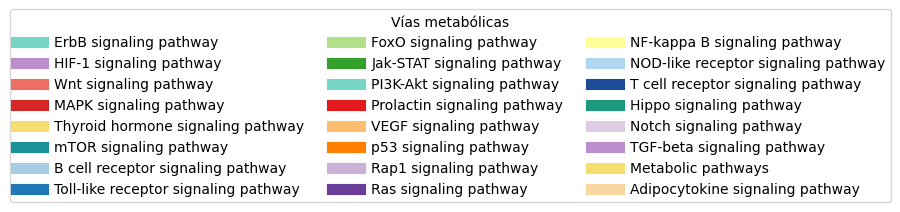

In [96]:
c = {
    'ErbB signaling pathway': '#76d7c4',
    'HIF-1 signaling pathway': '#bb8fce',
    'Wnt signaling pathway': '#ec7063',
    'MAPK signaling pathway': '#d62728',
    'Thyroid hormone signaling pathway': '#f7dc6f',
    'mTOR signaling pathway': '#1c9099',
    'B cell receptor signaling pathway': '#a6cee3',
    'Toll-like receptor signaling pathway':  '#1f78b4',
    'FoxO signaling pathway': '#b2df8a',
    'Jak-STAT signaling pathway': '#33a02c',
    'PI3K-Akt signaling pathway': '#76d7c4',
    'Prolactin signaling pathway': '#e31a1c',
    'VEGF signaling pathway':'#fdbf6f',
    'p53 signaling pathway':'#ff7f00',
    'Rap1 signaling pathway':'#cab2d6',
    'Ras signaling pathway':'#6a3d9a',
    'NF-kappa B signaling pathway':'#ffff99',
    'NOD-like receptor signaling pathway':'#aed6f1',
    'T cell receptor signaling pathway':'#1d4c99',
    'Hippo signaling pathway': '#1d997b',
    'Notch signaling pathway':'#decbe4',
    'TGF-beta signaling pathway': '#bb8fce',
    'Metabolic pathways': '#f7dc6f',
    'Adipocytokine signaling pathway': '#fad7a0'
}
fig, ax = plt.subplots(figsize=(6, 2))

# Añadir una leyenda con los colores
for label, color in c.items():
    ax.plot([], [], label=label, color=color, linewidth=8)

# Crear la leyenda y añadir un título
legend = ax.legend(loc='center', ncol=3)
legend.set_title('Vías metabólicas')

ax.axis('off')

plt.tight_layout()
plt.savefig('../../Plots/leyendaVias.pdf',  bbox_inches='tight')

# Mostrar la figura
plt.show()

In [97]:
dfsp = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_spectrum_Filter_KEGG.tsv', sep = '\t')
#dfsp = dfsp[dfsp['p_value'] <= 0.001]
dfsp = dfsp[~dfsp['function'].str.contains('cancer', case=False, na=False)]
dfsp = dfsp[dfsp['function'].str.contains('pathway', case=False, na=False)]
dfsp

,function,p_value,miRNA,Variant,DuplexEnergy,Jaccard,Region,UTR_region,InteractionRegionUTR
2,ErbB signaling pathway,0.012417,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"50,70"
4,HIF-1 signaling pathway,0.012417,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"50,70"
5,Insulin signaling pathway,0.035087,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"50,70"
8,Neurotrophin signaling pathway,0.039387,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"50,70"
13,Thyroid hormone signaling pathway,0.035087,hsa-miR-193a-5p,Gs4,-19.4,0.809524,5'UTR,>Gs4:45-209,"50,70"
...,...,...,...,...,...,...,...,...,...
4780,Thyroid hormone signaling pathway,0.005220,hsa-miR-29b-3p,Gs4,-10.0,0.800000,3'UTR,>Gs4:29824-29823,"33,52"
4784,VEGF signaling pathway,0.003531,hsa-miR-29b-3p,Gs4,-10.0,0.800000,3'UTR,>Gs4:29824-29823,"33,52"
4785,mTOR signaling pathway,0.005432,hsa-miR-29b-3p,Gs4,-10.0,0.800000,3'UTR,>Gs4:29824-29823,"33,52"
4789,Rap1 signaling pathway,0.042098,hsa-miR-140-5p,Gs1,-10.0,0.800000,3'UTR,>Gs1:29707-29733,"7,16"


In [98]:
g1 = list(dfsp[dfsp['Variant']=='Gs1']['miRNA'])
g2 = list(dfsp[dfsp['Variant']=='Gs2']['miRNA'])
g3 = list(dfsp[dfsp['Variant']=='Gs3']['miRNA'])
g4 = list(dfsp[dfsp['Variant']=='Gs4']['miRNA'])

eval = 0; contador = 0
for i in [g1, g2, g3, g4]:
    if len(i) > eval:
        print(f'{contador}', {len(i)})
        eval = len(i)
    contador +=1

g1 = g1 + ['NaN']*(eval - len(g1))
g2 = g2 + ['NaN']*(eval - len(g2))
g3 = g3 + ['NaN']*(eval - len(g3))
g4 = g4 + ['NaN']*(eval - len(g4))

len(g4)

0 {404}


404

In [99]:
df = pd.DataFrame({
                   'miRNA_Estrato_0': g1,
                   'miRNA_Estrato_1': g2, 
                   'miRNA_Estrato_2': g3, 
                   'miRNA_Estrato_3': g4
                  })
df

,miRNA_Estrato_0,miRNA_Estrato_1,miRNA_Estrato_2,miRNA_Estrato_3
0,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p
1,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p
2,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p
3,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p
4,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p,hsa-miR-193a-5p
...,...,...,...,...
399,hsa-miR-497-5p,NaN,hsa-miR-29b-3p,NaN
400,hsa-miR-497-5p,NaN,hsa-miR-29b-3p,NaN
401,hsa-miR-497-5p,NaN,NaN,NaN
402,hsa-miR-140-5p,NaN,NaN,NaN


In [100]:
df.to_csv('../../Data/Estratos/miRNA_predichos_SpectrumKeggEuler.tsv', sep = '\t', index = False)

In [101]:
ug1 = set(g1) - (set(g2) | set(g3) | set(g4))
ug2 = set(g2) - (set(g1) | set(g3) | set(g4))
ug3 = set(g3) - (set(g1) | set(g2) | set(g4))
ug4 = set(g4) - (set(g1) | set(g2) | set(g3))
ugG = set(g4) & set(g1) & set(g2) & set(g3)

print(f'{len(ug1)}, {len(ug2)},{len(ug3)},{len(ug4)}, {len(ugG)}')

4, 0,5,1, 33


In [102]:
dfsp_ug1 = dfsp[dfsp['miRNA'].isin(list(ug1))]
dfsp_ug1_count = pd.DataFrame(dfsp_ug1[['function', 'Variant', 'Region']].value_counts()).reset_index()

df_topsp_ug1 = dfsp_ug1_count.groupby(['Variant', 'Region']).head(3)


dfsp_ug2 = dfsp[dfsp['miRNA'].isin(list(ug2))]
dfsp_ug2_count = pd.DataFrame(dfsp_ug2[['function', 'Variant', 'Region']].value_counts()).reset_index()

df_topsp_ug2 = dfsp_ug2_count.groupby(['Variant', 'Region']).head(3)
df_topsp_ug2


dfsp_ug3 = dfsp[dfsp['miRNA'].isin(list(ug3))]
dfsp_ug3_count = pd.DataFrame(dfsp_ug3[['function', 'Variant', 'Region']].value_counts()).reset_index()

df_topsp_ug3 = dfsp_ug3_count.groupby(['Variant', 'Region']).head(3)
df_topsp_ug3



dfsp_ug4 = dfsp[dfsp['miRNA'].isin(list(ug4))]
dfsp_ug4_count = pd.DataFrame(dfsp_ug4[['function', 'Variant', 'Region']].value_counts()).reset_index()

df_topsp_ug4 = dfsp_ug4_count.groupby(['Variant', 'Region']).head(3)
df_topsp_ug4

dfsp_ugG = dfsp[dfsp['miRNA'].isin(list(ugG))]
dfsp_ugG_count = pd.DataFrame(dfsp_ugG[['function', 'Region']].value_counts()).reset_index()

df_topsp_ugG = dfsp_ugG_count.groupby(['Region']).head(5)
df_topsp_ugG


,function,Region,count
0,PI3K-Akt signaling pathway,5'UTR,71
1,FoxO signaling pathway,5'UTR,57
2,HIF-1 signaling pathway,5'UTR,42
3,Thyroid hormone signaling pathway,5'UTR,41
4,VEGF signaling pathway,5'UTR,37
20,PI3K-Akt signaling pathway,3'UTR,19
25,TGF-beta signaling pathway,3'UTR,15
26,VEGF signaling pathway,3'UTR,12
31,ErbB signaling pathway,3'UTR,11
32,HIF-1 signaling pathway,3'UTR,11


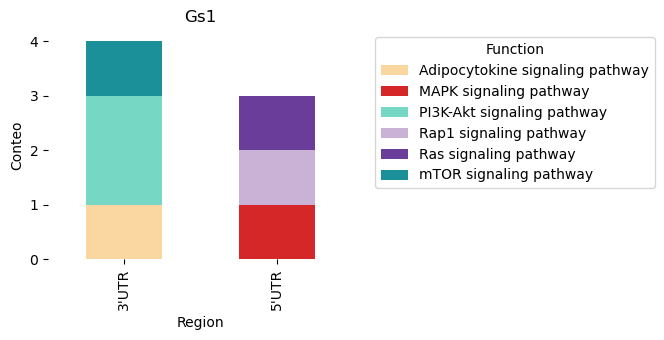

In [103]:
df_pivot = df_topsp_ug1.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(7, 3.5), edgecolor='none', color=c)

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Gs1')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGS1.pdf')
plt.show()

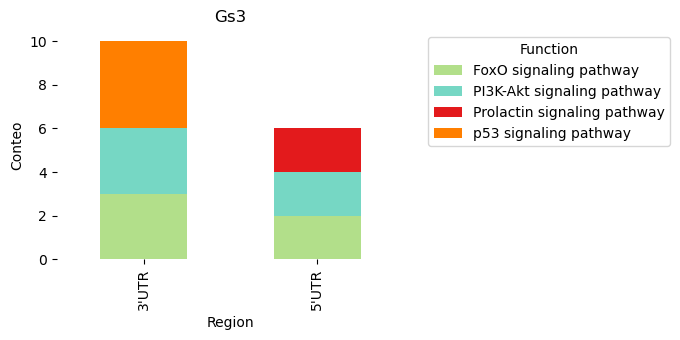

In [104]:
df_pivot = df_topsp_ug3.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(7, 3.5), edgecolor='none', color=c)

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Gs3')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGS3.pdf')
plt.show()

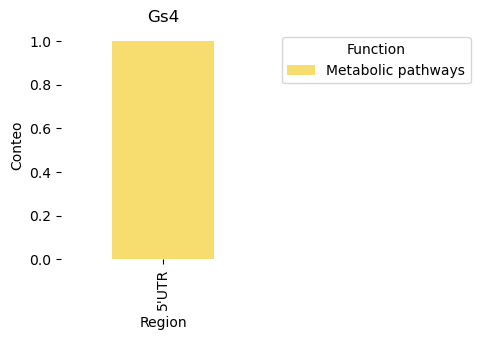

In [105]:
df_pivot = df_topsp_ug4.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(5, 3.5), edgecolor='none', color = c)

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Gs4')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGS4.pdf')
plt.show()

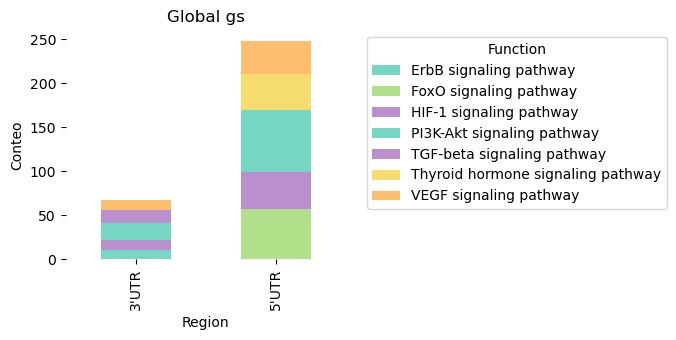

In [106]:
df_pivot = df_topsp_ugG.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(7, 3.5), edgecolor='none', color = c)

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Global gs')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGSG.pdf')
plt.show()

## constant clusters

In [107]:
dfgt = pd.read_csv('../../Data/Estratos/Pathways_ExpressionFilter/Expanded_miRNAPredicted_ConstantClusters_Filter_KEGG.tsv', sep = '\t')
#dfgt = dfgt[dfgt['p_value'] <= 0.001]
dfgt = dfgt[~dfgt['function'].str.contains('cancer', case=False, na=False)]
dfgt = dfgt[dfgt['function'].str.contains('pathway', case=False, na=False)]
dfgt

,function,p_value,miRNA,Variant,DuplexEnergy,Jaccard,Region,UTR_region,InteractionRegionUTR
8,FoxO signaling pathway,6.529860e-03,hsa-miR-503-5p,Gst2,-20.4,0.823529,5'UTR,>Gst2:45-77,"7,23"
10,HIF-1 signaling pathway,2.333250e-03,hsa-miR-503-5p,Gst2,-20.4,0.823529,5'UTR,>Gst2:45-77,"7,23"
16,NF-kappa B signaling pathway,6.577330e-03,hsa-miR-503-5p,Gst2,-20.4,0.823529,5'UTR,>Gst2:45-77,"7,23"
19,PI3K-Akt signaling pathway,2.222590e-08,hsa-miR-503-5p,Gst2,-20.4,0.823529,5'UTR,>Gst2:45-77,"7,23"
23,Prolactin signaling pathway,3.184480e-02,hsa-miR-503-5p,Gst2,-20.4,0.823529,5'UTR,>Gst2:45-77,"7,23"
...,...,...,...,...,...,...,...,...,...
2542,PI3K-Akt signaling pathway,5.419850e-05,hsa-miR-497-5p,Gst1,-10.0,0.818182,5'UTR,>Gst1:256-255,"2,12"
2549,T cell receptor signaling pathway,1.750050e-02,hsa-miR-497-5p,Gst1,-10.0,0.818182,5'UTR,>Gst1:256-255,"2,12"
2550,TGF-beta signaling pathway,4.292730e-02,hsa-miR-497-5p,Gst1,-10.0,0.818182,5'UTR,>Gst1:256-255,"2,12"
2552,mTOR signaling pathway,3.673040e-03,hsa-miR-497-5p,Gst1,-10.0,0.818182,5'UTR,>Gst1:256-255,"2,12"


In [108]:
g1 = list(dfgt[dfgt['Variant']=='Gst1']['miRNA'])
g2 = list(dfgt[dfgt['Variant']=='Gst2']['miRNA'])


eval = 0; contador = 0
for i in [g1, g2]:
    if len(i) > eval:
        print(f'{contador}', {len(i)})
        eval = len(i)
    contador +=1

g1 = g1 + ['NaN']*(eval - len(g1))

0 {306}
1 {431}


In [109]:
df = pd.DataFrame({
                   'miRNA_Estrato_0': g1,
                   'miRNA_Estrato_1': g2,
                  })
df

,miRNA_Estrato_0,miRNA_Estrato_1
0,hsa-miR-193a-5p,hsa-miR-503-5p
1,hsa-miR-193a-5p,hsa-miR-503-5p
2,hsa-miR-193a-5p,hsa-miR-503-5p
3,hsa-miR-193a-5p,hsa-miR-503-5p
4,hsa-miR-193a-5p,hsa-miR-503-5p
...,...,...
426,NaN,hsa-miR-497-5p
427,NaN,hsa-miR-497-5p
428,NaN,hsa-miR-497-5p
429,NaN,hsa-miR-497-5p


In [110]:
df.to_csv('../../Data/Estratos/miRNA_predichos_ConstantClustersKeggEuler.tsv', sep = '\t', index = False)

In [111]:
ug1 = set(g1) - set(g2)
ug2 = set(g2) - set(g1)
ugG = set(g1) & set(g2)

print(f'{len(ug1)}, {len(ug2)}, {len(ugG)}')

12, 16, 40


In [112]:

dfgt_ug1 = dfgt[dfgt['miRNA'].isin(list(ug1))]
dfgt_ug1_count = pd.DataFrame(dfgt_ug1[['function', 'Variant', 'Region']].value_counts()).reset_index()

df_topgt_ug1 = dfgt_ug1_count.groupby(['Variant', 'Region']).head(5)
df_topgt_ug1

dfgt_ug2 = dfgt[dfgt['miRNA'].isin(list(ug2))]
dfgt_ug2_count = pd.DataFrame(dfgt_ug2[['function', 'Variant', 'Region']].value_counts()).reset_index()

df_topgt_ug2 = dfgt_ug2_count.groupby(['Variant', 'Region']).head(5)
df_topgt_ug2

dfgt_ugG = dfgt[dfgt['miRNA'].isin(list(ugG))]
dfgt_ugG_count = pd.DataFrame(dfgt_ugG[['function', 'Region']].value_counts()).reset_index()

df_topgt_ugG = dfgt_ugG_count.groupby(['Region']).head(5)
df_topgt_ugG

,function,Region,count
0,PI3K-Akt signaling pathway,5'UTR,39
1,FoxO signaling pathway,5'UTR,34
2,HIF-1 signaling pathway,5'UTR,26
3,mTOR signaling pathway,5'UTR,21
4,p53 signaling pathway,5'UTR,20
11,PI3K-Akt signaling pathway,3'UTR,14
16,FoxO signaling pathway,3'UTR,10
21,HIF-1 signaling pathway,3'UTR,9
22,Thyroid hormone signaling pathway,3'UTR,8
23,Ras signaling pathway,3'UTR,8


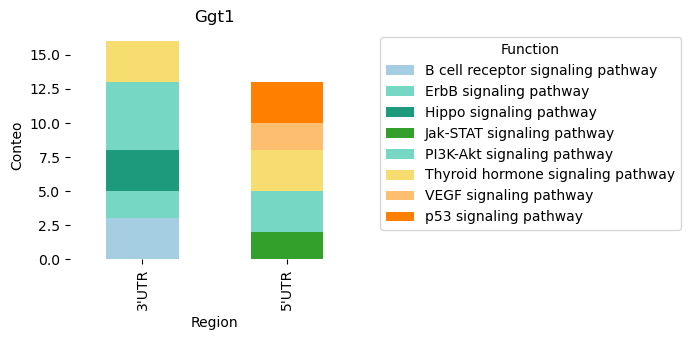

In [113]:
df_pivot = df_topgt_ug1.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(7, 3.5), edgecolor='none', color = c)

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Ggt1')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGT1.pdf')
plt.show()

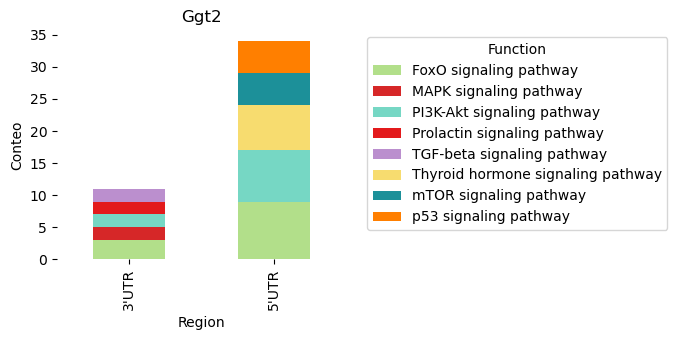

In [114]:
df_pivot = df_topgt_ug2.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(7, 3.5),  edgecolor='none', color = c)

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Ggt2')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGT2.pdf')
plt.show()

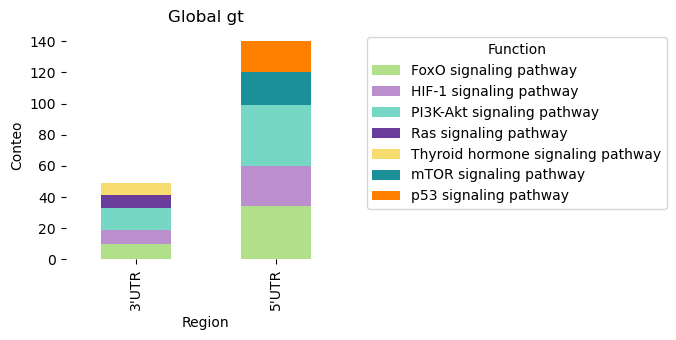

In [115]:
df_pivot = df_topgt_ugG.pivot_table(index='Region', columns='function', values='count', aggfunc='sum', fill_value=0)

colors = sns.color_palette("Set2", len(df_pivot.columns))

df_pivot.plot(kind='bar', stacked=True, figsize=(7, 3.5), edgecolor='none', color = c)

# Añadir etiquetas y título
plt.ylabel('Conteo')
plt.xlabel('Region')
plt.title('Global gt')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.savefig('../../Plots/ViasUnicasGTG.pdf')
plt.show()